# Gerando Dados

In [1]:
import pandas as pd
import numpy as np

In [2]:
ods = pd.read_excel('Ods_Brasil_321.xlsx')
ods

,Local,Tipo,2016,2017,2018,2019,2020,2021,2022
0,Brasil,Brasil,16.4,15.6,15.2,15.4,14.0,14.5,15.5
1,Norte,Região,21.7,20.4,19.9,19.9,18.9,19.5,19.7
2,Rondônia,Estado,17.2,16.3,15.6,14.8,15.7,15.3,17.0
3,Acre,Estado,19.5,17.6,19.5,19.5,19.3,21.6,21.5
4,Amazonas,Estado,22.4,22.2,21.7,21.5,18.7,20.2,21.4
5,Roraima,Estado,25.8,23.3,25.1,23.4,23.0,26.2,25.1
6,Pará,Estado,22.0,19.9,18.9,19.3,19.0,18.3,18.6
7,Amapá,Estado,26.8,28.0,25.7,27.5,24.8,27.1,23.5
8,Tocantins,Estado,19.1,17.8,18.3,16.9,15.5,17.8,16.7
9,Nordeste,Região,19.0,18.2,17.4,17.5,16.3,16.4,17.5


In [3]:
Atlas_Estado = pd.read_excel('Atlas 2013_municipal, estadual e Brasil.xlsx', sheet_name='UF 91-00-10')[['ANO', 'UFN', 'MORT5', 'POP']]
Atlas_Estado.head(10)

,ANO,UFN,MORT5,POP
0,1991,Rondônia,54.06,1120423
1,1991,Acre,50.63,412309
2,1991,Amazonas,61.49,2058501
3,1991,Roraima,63.11,191382
4,1991,Pará,64.44,4863829
5,1991,Amapá,54.31,284283
6,1991,Tocantins,83.26,904011
7,1991,Maranhão,106.43,4891092
8,1991,Piauí,84.80,2551985
9,1991,Ceará,82.70,6286483


In [4]:
regioes = {
    'Norte': ['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins'],
    'Nordeste': ['Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia'],
    'Sudeste': ['Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo'],
    'Sul': ['Paraná', 'Santa Catarina', 'Rio Grande do Sul'],
    'Centro-Oeste': ['Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal']
}
regioes['Brasil'] = regioes['Norte'] + regioes['Nordeste'] + regioes['Sudeste'] + regioes['Sul'] + regioes['Centro-Oeste']

In [5]:
vals = {}
for ano in [1991, 2000, 2010]:
    for regiao in regioes:
        dados = Atlas_Estado[Atlas_Estado['UFN'].isin(regioes[regiao]) & (Atlas_Estado['ANO'] == ano)]
        vals[(regiao, ano)] = sum(dados['MORT5'] * dados['POP']) / sum(dados['POP'])

vals


{('Norte', 1991): 63.47226768115225,
 ('Nordeste', 1991): 89.84018933346357,
 ('Sudeste', 1991): 35.83700416482288,
 ('Sul', 1991): 33.740939731927476,
 ('Centro-Oeste', 1991): 35.945432865525724,
 ('Brasil', 1991): 53.074711716326625,
 ('Norte', 2000): 38.95843481217023,
 ('Nordeste', 2000): 55.28584408263402,
 ('Sudeste', 2000): 24.76194219123049,
 ('Sul', 2000): 20.9815287140764,
 ('Centro-Oeste', 2000): 28.287924720559456,
 ('Brasil', 2000): 34.112461458775854,
 ('Norte', 2010): 20.516868039745184,
 ('Nordeste', 2010): 24.106388678979716,
 ('Sudeste', 2010): 16.320398932621597,
 ('Sul', 2010): 14.379820307051807,
 ('Centro-Oeste', 2010): 17.96655905366425,
 ('Brasil', 2010): 18.68022940984921}

In [6]:
for rols in Atlas_Estado.iterrows():
    vals[(rols[1]['UFN'], rols[1]['ANO'])] = rols[1]['MORT5']

vals

{('Norte', 1991): 63.47226768115225,
 ('Nordeste', 1991): 89.84018933346357,
 ('Sudeste', 1991): 35.83700416482288,
 ('Sul', 1991): 33.740939731927476,
 ('Centro-Oeste', 1991): 35.945432865525724,
 ('Brasil', 1991): 53.074711716326625,
 ('Norte', 2000): 38.95843481217023,
 ('Nordeste', 2000): 55.28584408263402,
 ('Sudeste', 2000): 24.76194219123049,
 ('Sul', 2000): 20.9815287140764,
 ('Centro-Oeste', 2000): 28.287924720559456,
 ('Brasil', 2000): 34.112461458775854,
 ('Norte', 2010): 20.516868039745184,
 ('Nordeste', 2010): 24.106388678979716,
 ('Sudeste', 2010): 16.320398932621597,
 ('Sul', 2010): 14.379820307051807,
 ('Centro-Oeste', 2010): 17.96655905366425,
 ('Brasil', 2010): 18.68022940984921,
 ('Rondônia', 1991): 54.06,
 ('Acre', 1991): 50.63,
 ('Amazonas', 1991): 61.49,
 ('Roraima', 1991): 63.11,
 ('Pará', 1991): 64.44,
 ('Amapá', 1991): 54.31,
 ('Tocantins', 1991): 83.26,
 ('Maranhão', 1991): 106.43,
 ('Piauí', 1991): 84.8,
 ('Ceará', 1991): 82.7,
 ('Rio Grande do Norte', 1991):

In [7]:
a = []
for i, j in vals.items():
    a.append([i[0], i[1], j])

df = pd.DataFrame(a, columns=['Região', 'Ano', 'Mortalidade']).sort_values(by=['Região', 'Ano'])

In [8]:
df_pivot = df.pivot(index="Região", columns="Ano", values="Mortalidade").reset_index()

# Renomeando as colunas
df_pivot.columns.name = None  # Removendo o nome das colunas
df_pivot.columns = ["Região", "1991", "2000", "2010"]

# Exibindo o resultado
df_pivot

,Região,1991,2000,2010
0,Acre,50.630000,34.080000,24.930000
1,Alagoas,94.680000,62.050000,31.030000
2,Amapá,54.310000,36.350000,16.160000
3,Amazonas,61.490000,46.340000,18.220000
4,Bahia,90.740000,53.380000,23.490000
5,Brasil,53.074712,34.112461,18.680229
6,Ceará,82.700000,53.390000,20.760000
7,Centro-Oeste,35.945433,28.287925,17.966559
8,Distrito Federal,31.750000,24.040000,15.850000
9,Espírito Santo,40.600000,27.350000,16.330000


In [9]:
df = pd.merge(ods, df_pivot, left_on="Local", right_on="Região", how="left")
df = df[['Local', 'Tipo', '1991', '2000', '2010', 2016, 2017, 2018, 2019, 2020, 2021, 2022]]
df.columns = ['Local', 'Tipo', 1991, 2000, 2010, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
df = df.sort_values(by=['Tipo', 'Local'])
df

,Local,Tipo,1991,2000,2010,2016,2017,2018,2019,2020,2021,2022
0,Brasil,Brasil,53.074712,34.112461,18.680229,16.4,15.6,15.2,15.4,14.0,14.5,15.5
3,Acre,Estado,50.630000,34.080000,24.930000,19.5,17.6,19.5,19.5,19.3,21.6,21.5
16,Alagoas,Estado,94.680000,62.050000,31.030000,18.2,17.2,16.0,17.0,15.2,17.0,16.6
7,Amapá,Estado,54.310000,36.350000,16.160000,26.8,28.0,25.7,27.5,24.8,27.1,23.5
4,Amazonas,Estado,61.490000,46.340000,18.220000,22.4,22.2,21.7,21.5,18.7,20.2,21.4
18,Bahia,Estado,90.740000,53.380000,23.490000,20.5,19.2,18.9,18.9,17.5,18.0,18.4
12,Ceará,Estado,82.700000,53.390000,20.760000,16.8,17.0,15.6,15.7,14.7,13.7,14.6
32,Distrito Federal,Estado,31.750000,24.040000,15.850000,11.9,12.8,11.5,10.3,10.7,12.0,12.2
21,Espírito Santo,Estado,40.600000,27.350000,16.330000,14.2,12.6,12.4,12.6,11.4,13.3,13.5
31,Goiás,Estado,34.750000,28.220000,16.280000,17.8,15.8,16.3,16.8,14.1,15.1,15.6


In [10]:
df.to_csv('ODS_Mortalidade_321.csv', index=False)

# Usando os Dados

In [11]:
anos_1 = [1991, 2000, 2010]
anos_2 = [2016, 2017, 2018, 2019, 2020, 2021, 2022]
anos_3 = anos_1 + [2020]
anos = anos_1 + anos_2

In [12]:
br = df.loc[df['Local'] == 'Brasil'][[i for i in df.columns if i not in ['Local', 'Tipo']]]
br

,1991,2000,2010,2016,2017,2018,2019,2020,2021,2022
0,53.074712,34.112461,18.680229,16.4,15.6,15.2,15.4,14.0,14.5,15.5


In [13]:
br.values

array([[53.07471172, 34.11246146, 18.68022941, 16.4       , 15.6       ,
        15.2       , 15.4       , 14.        , 14.5       , 15.5       ]])

In [14]:
x = anos
x = np.array(x)
y = br[anos].values[0]

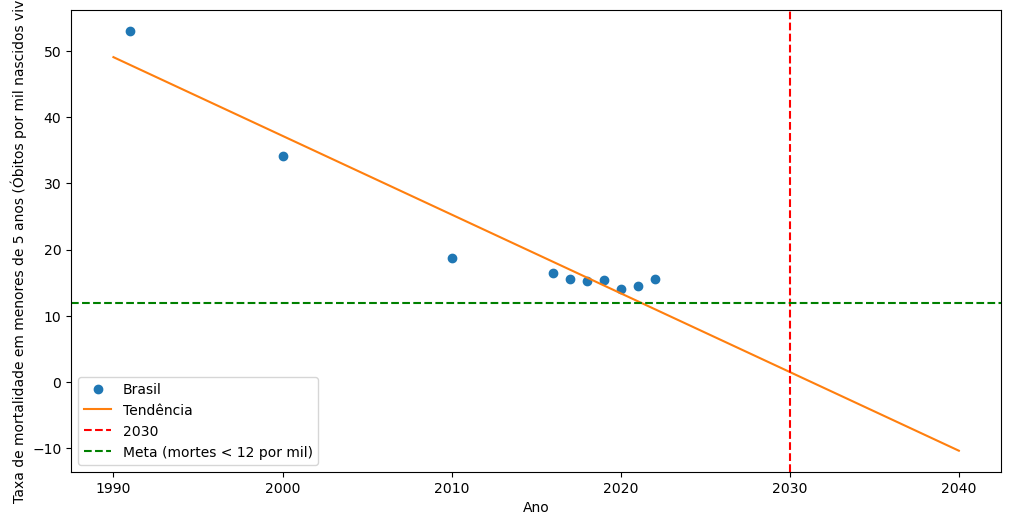

In [15]:
import matplotlib.pyplot as plt
def plotar(x, y):
    plt.figure(figsize=(12, 6))
    plt.plot(x, y, 'o', label='Brasil')
    plt.xlabel('Ano')
    plt.ylabel('Taxa de mortalidade em menores de 5 anos (Óbitos por mil nascidos vivos)')

    xx = np.linspace(1990, 2040, 50)
    plt.plot(xx, np.polyval(np.polyfit(x, y, 1), xx), label='Tendência')

    # marcar onde estaremos em 2030
    plt.axvline(2030, color='red', linestyle='--', label='2030')

    # marcar quando alcançaremos a meta (12)
    plt.axhline(12, color='green', linestyle='--', label='Meta (mortes < 12 por mil)')

    # colocar o eixo y de 0 ao máximo de y
    #plt.ylim(0, max(y) + 1)

    plt.legend()
    plt.show() 
    

plotar(x, y)

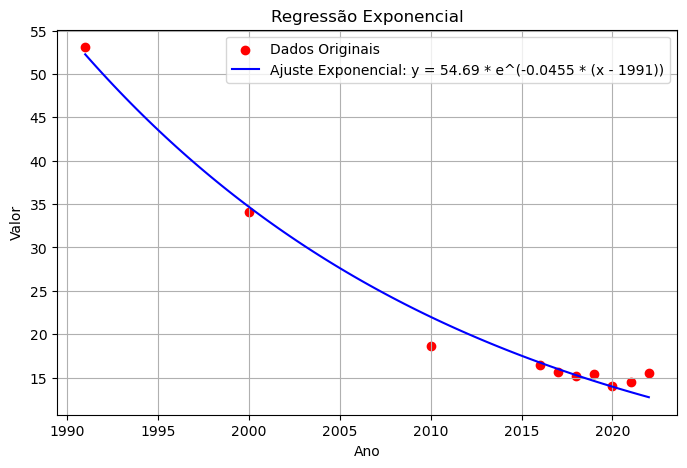

(54.68748748311848, -0.04553455857880864, 1.4807180597013179)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Dados fornecidos
anos = np.array([1991, 2000, 2010, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
valores = np.array([53.074712, 34.112461, 18.680229, 16.4, 15.6, 15.2, 15.4, 14.0, 14.5, 15.5])

# Função exponencial para ajuste
def func_exp(x, a, b):
    return a * np.exp(b * (x - 1990))  # Normalizando para evitar overflow

def rmse (y, y_pred):
    return np.sqrt(sum((y - y_pred) ** 2) / len(y))

# Ajuste da curva
params, covariance = curve_fit(func_exp, anos, valores, p0=(50, -0.1))
a, b = params

# Gerando valores ajustados
anos_pred = np.linspace(min(anos), max(anos), 100)
valores_pred = func_exp(anos_pred, a, b)

# Plotando os resultados
plt.figure(figsize=(8, 5))
plt.scatter(anos, valores, label="Dados Originais", color='red')
plt.plot(anos_pred, valores_pred, label=f"Ajuste Exponencial: y = {a:.2f} * e^({b:.4f} * (x - {anos[0]}))", color='blue')
plt.xlabel("Ano")
plt.ylabel("Valor")
plt.legend()
plt.grid()
plt.title("Regressão Exponencial")
plt.show()

# Retornando os parâmetros ajustados
a, b, rmse(valores, func_exp(anos, a, b))


In [17]:
ibge = pd.read_excel('tabela6695.xlsx')
ibge = ibge.ffill(axis=0)
ibge.columns = ['Nível', 'Código', 'Local', 'Ano', 'Morte5']


In [18]:
a = ibge[ibge['Local'] == 'Brasil']
x = a['Ano'].values
y = a['Morte5'].values

x, y

(array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
        2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
        2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
       dtype=int64),
 array([53.7, 50.7, 47.8, 45.2, 42.6, 40.2, 38. , 35.8, 33.8, 31.9, 30.1,
        28.7, 27.2, 26.1, 25. , 23.7, 22.7, 21.6, 20.5, 19.6, 18.6, 17.7,
        17.3, 16.7, 16.3, 15.8, 16.4, 15.6, 15.2, 15.4, 14. , 14.5, 15.5]))

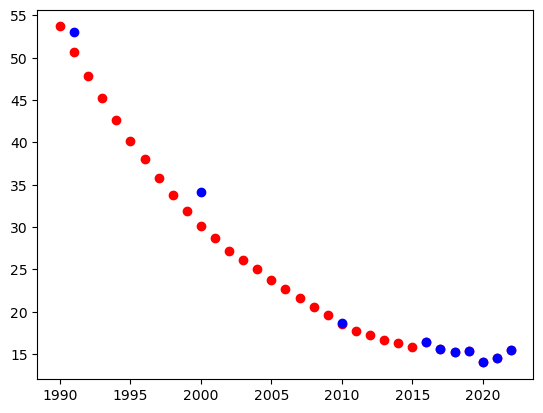

In [19]:
plt.scatter(x, y, color='red')
plt.scatter(anos, valores, color='blue')
plt.show()

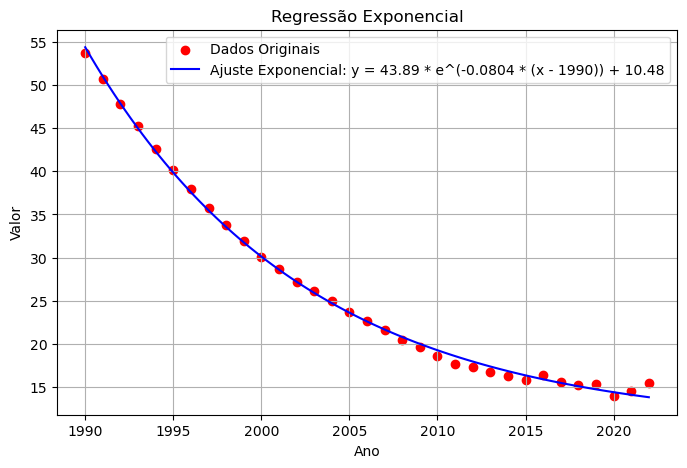

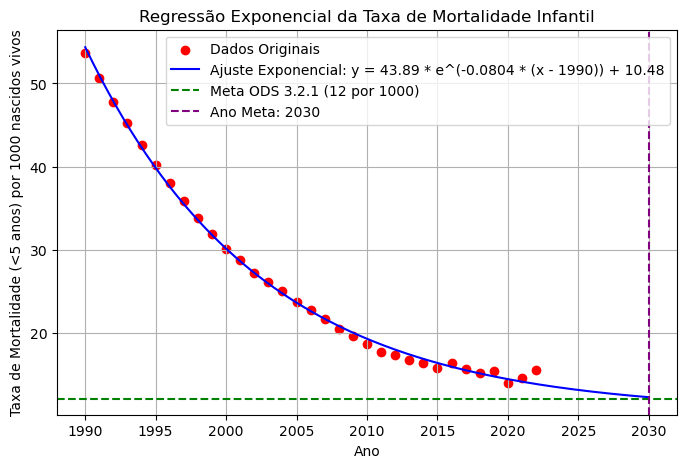

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Dados fornecidos
anos = x
valores = y

# Função exponencial para ajuste
def func_exp(x, a, b, c):
    return a * np.exp(b * (x - 1990)) + c

def rmse (y, y_pred):
    return np.sqrt(sum((y - y_pred) ** 2) / len(y))

# Ajuste da curva
params, covariance = curve_fit(func_exp, anos, valores, p0=(50, -0.1, 10))
a, b, c = params
#a, b, c  = 40, -0.09, 12

# Gerando valores ajustados
anos_pred = np.linspace(min(anos), max(anos), 100)
valores_pred = func_exp(anos_pred, a, b, c)

# Plotando os resultados
plt.figure(figsize=(8, 5))
plt.scatter(anos, valores, label="Dados Originais", color='red')
plt.plot(anos_pred, valores_pred, label=f"Ajuste Exponencial: y = {a:.2f} * e^({b:.4f} * (x - {1990})) + {c:.2f}", color='blue')
plt.xlabel("Ano")
plt.ylabel("Valor")
plt.legend()
plt.grid()
plt.title("Regressão Exponencial")
plt.show()

# Retornando os parâmetros ajustados
a, b, c, rmse(valores, func_exp(anos, a, b, c))

# Definição da meta para 2030
ano_meta = 2030
valor_meta = 12  # Óbitos por mil nascidos vivos

# Gerando novos valores ajustados até 2030
anos_pred = np.linspace(min(anos), ano_meta, 150)
valores_pred = func_exp(anos_pred, a, b, c)

# Plotando os resultados com a meta
plt.figure(figsize=(8, 5))
plt.scatter(anos, valores, label="Dados Originais", color='red')
plt.plot(anos_pred, valores_pred, label=f"Ajuste Exponencial: y = {a:.2f} * e^({b:.4f} * (x - {anos[0]})) + {c:.2f}", color='blue')

# Adicionando a meta de 12 óbitos por mil em 2030
plt.axhline(y=valor_meta, color='green', linestyle='--', label="Meta ODS 3.2.1 (12 por 1000)")
plt.axvline(x=ano_meta, color='purple', linestyle='--', label="Ano Meta: 2030")

plt.xlabel("Ano")
plt.ylabel("Taxa de Mortalidade (<5 anos) por 1000 nascidos vivos")
plt.legend()
plt.grid()
plt.title("Regressão Exponencial da Taxa de Mortalidade Infantil")

plt.show()


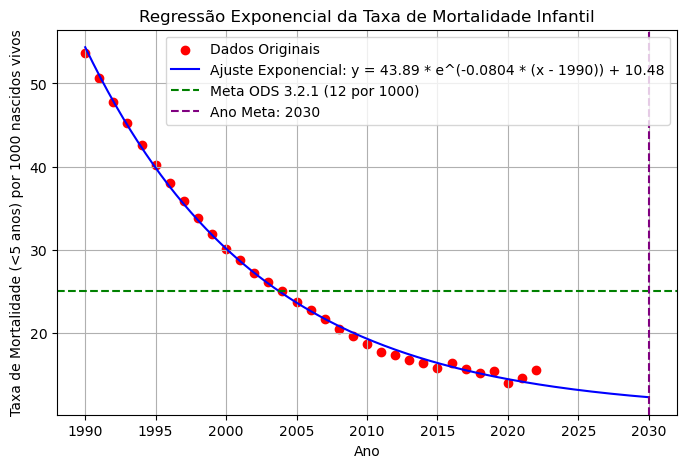

In [21]:
# Definição da meta para 2030
ano_meta = 2030
valor_meta = 25  # Óbitos por mil nascidos vivos

# Gerando novos valores ajustados até 2030
anos_pred = np.linspace(min(anos), ano_meta, 150)
valores_pred = func_exp(anos_pred, a, b, c)

# Plotando os resultados com a meta
plt.figure(figsize=(8, 5))
plt.scatter(anos, valores, label="Dados Originais", color='red')
plt.plot(anos_pred, valores_pred, label=f"Ajuste Exponencial: y = {a:.2f} * e^({b:.4f} * (x - {anos[0]})) + {c:.2f}", color='blue')

# Adicionando a meta de 12 óbitos por mil em 2030
plt.axhline(y=valor_meta, color='green', linestyle='--', label="Meta ODS 3.2.1 (12 por 1000)")
plt.axvline(x=ano_meta, color='purple', linestyle='--', label="Ano Meta: 2030")

plt.xlabel("Ano")
plt.ylabel("Taxa de Mortalidade (<5 anos) por 1000 nascidos vivos")
plt.legend()
plt.grid()
plt.title("Regressão Exponencial da Taxa de Mortalidade Infantil")

plt.show()

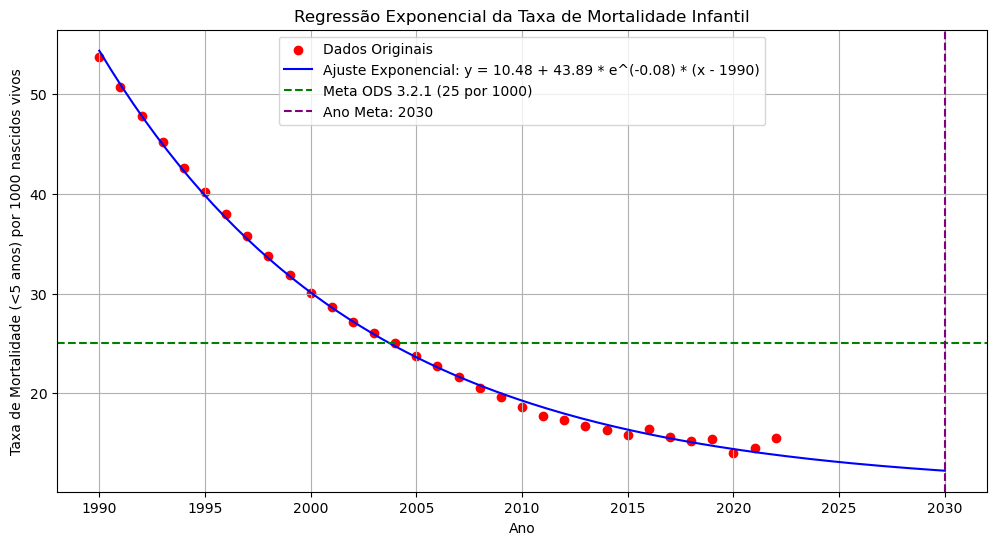

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Função exponencial para ajuste
def func_exp(x, a, b, c):
    return a * np.exp(b * (x - 1990)) + c

def rmse (y, y_pred):
    return np.sqrt(sum((y - y_pred) ** 2) / len(y))

def ajustar_curva(x, y):
    params, _ = curve_fit(func_exp, x, y, p0=(50, -0.1, 10))
    return params

def plot_exp (x, y, params):
    a, b, c = params    
    ano_meta = 2030
    valor_meta = 25  # Óbitos por mil nascidos vivos

    anos_pred = np.linspace(min(anos), ano_meta, 150)
    valores_pred = func_exp(anos_pred, a, b, c)

    plt.figure(figsize=(12, 6))
    plt.scatter(x, y, label='Dados Originais', color='red')
    plt.plot(anos_pred, valores_pred, label=f'Ajuste Exponencial: y = {c:0.2f} + {a:0.2f} * e^({b:0.2f}) * (x - 1990)', color='blue')

    plt.axhline(y=valor_meta, color='green', linestyle='--', label="Meta ODS 3.2.1 (25 por 1000)")
    plt.axvline(x=ano_meta, color='purple', linestyle='--', label="Ano Meta: 2030")

    plt.xlabel("Ano")
    plt.ylabel("Taxa de Mortalidade (<5 anos) por 1000 nascidos vivos")
    plt.legend()
    plt.grid()
    plt.title("Regressão Exponencial da Taxa de Mortalidade Infantil")
    plt.show()

params = ajustar_curva(anos, valores)
plot_exp(anos, valores, params)

In [23]:
x = anos_1
x = np.array(x)
y = br[x].values[0]

C:\Users\joaov\AppData\Local\Temp\ipykernel_3340\2608869535.py:13: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(func_exp, x, y, p0=(50, -0.1, 10))


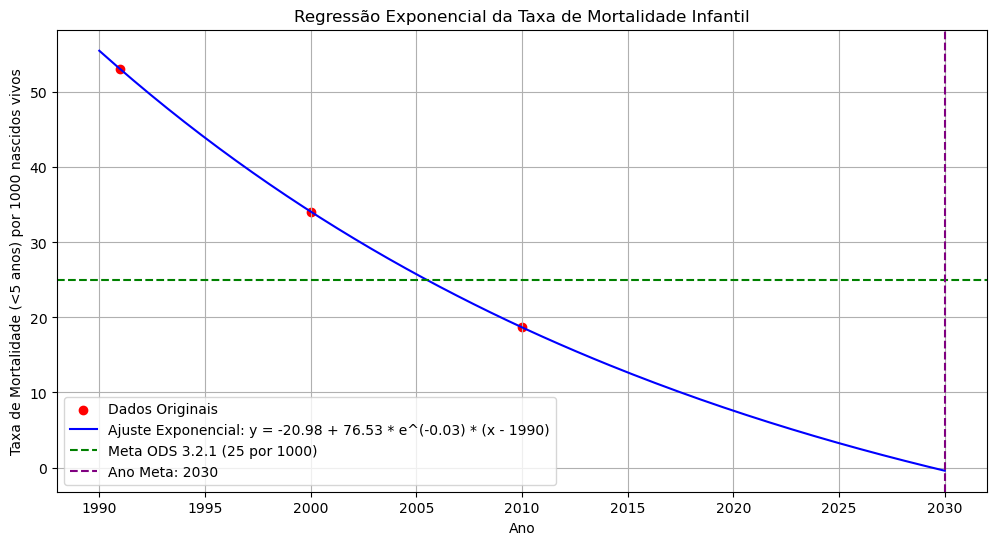

In [24]:
plot_exp(x, y, ajustar_curva(x, y))

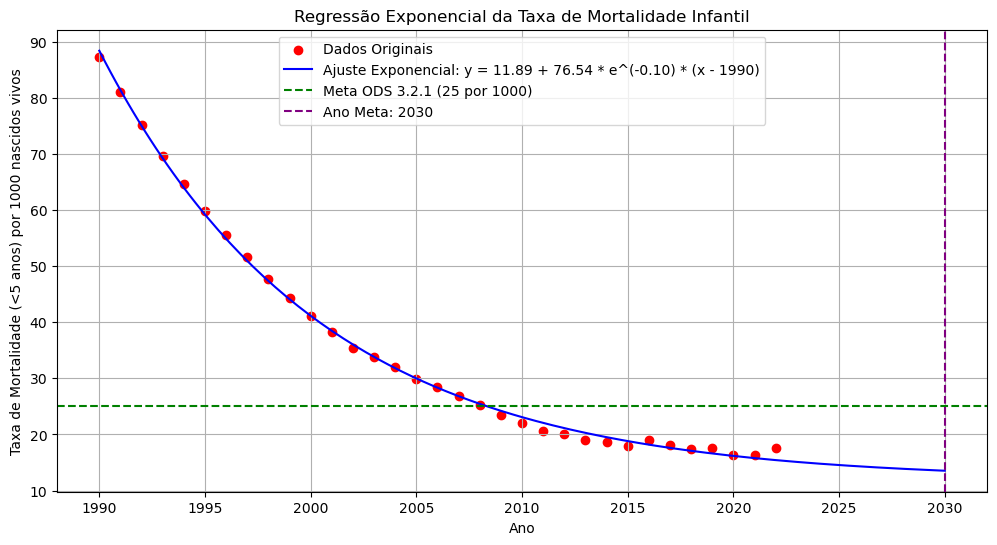

In [25]:
a = ibge[ibge['Local'] == 'Nordeste']
x = a['Ano'].values
y = a['Morte5'].values

plot_exp(x, y, ajustar_curva(x, y))